# <center> Breast Cancer Survival Prediction (Team 3)
<center> Anqi Zhu

In [2]:
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.graph_objects as go

from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.utils.fixes import loguniform
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

from sklearn.decomposition import PCA, KernelPCA
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import roc_auc_score, roc_curve, auc
from scipy import stats

In [3]:
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

[Data Sourse.](https://ieee-dataport.org/open-access/seer-breast-cancer-data)

For more information about stage description, see https://seer.cancer.gov/seerstat/variables/seer/ajcc-stage/6th/breast.html.

**FEATURE DESCRIPTION**

| Feature | Description | 
| :--- | --- |
| AGE | The age of the patient at diagnosis for the cancer, represents the patient’s actual age in years. |
| RACE | (White, Black, Other) |
| MARITAL STATUS | The patient’s marital status at the time of diagnosis for the reportable tumor. |
| T STAGE | The size and extent of the primary tumor, with T1 being the earliest stage and T4 being the most advanced. |
| N STAGE | Different stages of lymph node involvement in breast cancer. | 
| 6TH STAGE | The 6th edition of the TNM staging system for breast cancer, which was used until 2002, included five stages. | 
| Grade | How much cancer cells look like normal cells. A lower grade (1) indicates a well-differentiated cancer with a low risk of spreading, while a higher grade (3) indicates a poorly differentiated cancer with a higher risk of spreading. |
| A STAGE | A simplified version of stage (Regional, Distant) | 
| TUMOR SIZE | Exact tumor size in millimeters. | 
| ESTROGEN STATUS | ER, whether or not breast cancer cells have receptors that can bind to the hormone estrogen. (Positive, Negative). |
| PROGESTERONE STATUS | PR, whether or not breast cancer cells have receptors that can bind to the hormone progesterone (Positive, Negative). |
| REGIONAL NODES EXAMINED | Total number of regional lymph nodes that were removed and examined by the pathologist. |
| REGIONAL NODES POSITIVE | Exact number of regional lymph nodes examined by the pathologist that were found to contain metastases. |
| SURVIVAL MONTHS | The length of time between the date of diagnosis and the date of death (if the patient died during the study period) or the date of last follow-up (if the patient was still alive at the end of the study period). | 
| STATUS | (Binary target: Alive, Dead) Any patient that dies after the follow-up cut-off date is recoded to alive as of the cut-off date. | 




In [4]:
df = pd.read_csv('SEER Breast Cancer Dataset .csv')
df.head()

,Age,Race,Marital Status,Unnamed: 3,T Stage,N Stage,6th Stage,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,43,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),NaN,T2,N3,IIIC,Moderately differentiated; Grade II,Regional,40,Positive,Positive,19,11,1,Alive
1,47,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),NaN,T2,N2,IIIA,Moderately differentiated; Grade II,Regional,45,Positive,Positive,25,9,2,Alive
2,67,White,Married (including common law),NaN,T2,N1,IIB,Poorly differentiated; Grade III,Regional,25,Positive,Positive,4,1,2,Dead
3,46,White,Divorced,NaN,T1,N1,IIA,Moderately differentiated; Grade II,Regional,19,Positive,Positive,26,1,2,Dead
4,63,White,Married (including common law),NaN,T2,N2,IIIA,Moderately differentiated; Grade II,Regional,35,Positive,Positive,21,5,3,Dead


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     4024 non-null   int64  
 1   Race                    4024 non-null   object 
 2   Marital Status          4024 non-null   object 
 3   Unnamed: 3              0 non-null      float64
 4   T Stage                 4024 non-null   object 
 5   N Stage                 4024 non-null   object 
 6   6th Stage               4024 non-null   object 
 7   Grade                   4024 non-null   object 
 8   A Stage                 4024 non-null   object 
 9   Tumor Size              4024 non-null   int64  
 10  Estrogen Status         4024 non-null   object 
 11  Progesterone Status     4024 non-null   object 
 12  Regional Node Examined  4024 non-null   int64  
 13  Reginol Node Positive   4024 non-null   int64  
 14  Survival Months         4024 non-null   

## 0 Data Cleansing

In [6]:
duplicated_rows = df[df.duplicated()]
duplicated_rows

,Age,Race,Marital Status,Unnamed: 3,T Stage,N Stage,6th Stage,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
1010,63,White,Married (including common law),NaN,T1,N1,IIA,Moderately differentiated; Grade II,Regional,17,Positive,Positive,9,1,56,Alive


In [7]:
for i in df.select_dtypes('object').columns:
    print(i, df[i].unique())

Race  ['Other (American Indian/AK Native, Asian/Pacific Islander)' 'White'
 'Black']
Marital Status ['Married (including common law)' 'Divorced' 'Single (never married)'
 'Widowed' 'Separated']
T Stage  ['T2' 'T1' 'T3' 'T4']
N Stage ['N3' 'N2' 'N1']
6th Stage ['IIIC' 'IIIA' 'IIB' 'IIA' 'IIIB']
Grade ['Moderately differentiated; Grade II' 'Poorly differentiated; Grade III'
 'Well differentiated; Grade I' 'Undifferentiated; anaplastic; Grade IV']
A Stage ['Regional' 'Distant']
Estrogen Status ['Positive' 'Negative']
Progesterone Status ['Positive' 'Negative']
Status ['Alive' 'Dead']


In [8]:
# simplify values for better visualization
race_map = {'Other (American Indian/AK Native, Asian/Pacific Islander)': 'Other', 
            'White': 'White', 
            'Black':'Black'}
marital_map = {'Married (including common law)':'Married', 
               'Divorced':'Divorced', 
               'Single (never married)':'Single', 
               'Widowed':'Widowed', 
               'Separated':'Separated'}
grade_map = {'Moderately differentiated; Grade II':'Grade II',
             'Poorly differentiated; Grade III':'Grade III',
             'Well differentiated; Grade I':'Grade I',
             'Undifferentiated; anaplastic; Grade IV':'Grade IV'}

In [9]:
df.columns

Index(['Age', 'Race ', 'Marital Status', 'Unnamed: 3', 'T Stage ', 'N Stage',
       '6th Stage', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status'],
      dtype='object')

In [10]:
df = df.rename(columns={'Race ': 'Race', 'T Stage ':'T Stage'})
df = df.drop('Unnamed: 3', axis=1) # drop useless column
df.drop_duplicates(inplace=True) # drop duplicates
df['Race'] = df['Race'].map(race_map)
df['Marital Status'] = df['Marital Status'].map(marital_map)
df['Grade'] = df['Grade'].map(grade_map)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4023 entries, 0 to 4023
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4023 non-null   int64 
 1   Race                    4023 non-null   object
 2   Marital Status          4023 non-null   object
 3   T Stage                 4023 non-null   object
 4   N Stage                 4023 non-null   object
 5   6th Stage               4023 non-null   object
 6   Grade                   4023 non-null   object
 7   A Stage                 4023 non-null   object
 8   Tumor Size              4023 non-null   int64 
 9   Estrogen Status         4023 non-null   object
 10  Progesterone Status     4023 non-null   object
 11  Regional Node Examined  4023 non-null   int64 
 12  Reginol Node Positive   4023 non-null   int64 
 13  Survival Months         4023 non-null   int64 
 14  Status                  4023 non-null   object
dtypes: i

**NOTE**

There are 4,023 oversavations and 15 variables after initial data cleansing. 

- 9 categorical (4 ordinal, 5 nominal)
- 5 numerical
- 1 target

In [11]:
df.describe() # check statistics and outliers

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
count,4023.000000,4023.000000,4023.000000,4023.000000,4023.000000
mean,53.969923,30.477007,14.358439,4.158837,71.301765
std,8.963118,21.121253,8.100241,5.109724,22.923009
min,30.000000,1.000000,1.000000,1.000000,1.000000
25%,47.000000,16.000000,9.000000,1.000000,56.000000
50%,54.000000,25.000000,14.000000,2.000000,73.000000
75%,61.000000,38.000000,19.000000,5.000000,90.000000
max,69.000000,140.000000,61.000000,46.000000,107.000000


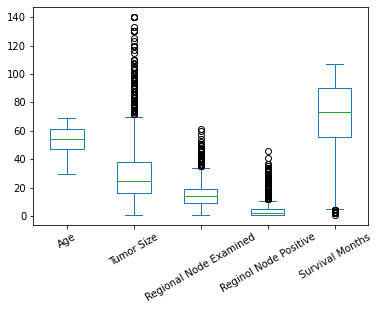

In [12]:
df.plot(kind="box")
plt.xticks(rotation=30)
plt.show()

In [13]:
df[df['Tumor Size'] == 140] # ?outliers?

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
473,49,White,Married,T3,N1,IIIA,Grade II,Regional,140,Positive,Positive,14,2,48,Alive
655,41,White,Married,T3,N3,IIIC,Grade III,Regional,140,Positive,Positive,41,15,51,Dead
1028,60,White,Divorced,T3,N2,IIIA,Grade II,Regional,140,Positive,Positive,21,5,57,Alive
1451,47,White,Married,T3,N2,IIIA,Grade I,Regional,140,Positive,Positive,23,7,64,Alive
2947,63,White,Married,T4,N2,IIIB,Grade II,Regional,140,Positive,Positive,9,8,89,Alive


**NOTE**

It seems there are so many "outliers", and it's hard to define a threshold. So, firstly I just keep all observations. 

## 1 EDA

### 1.1 Univariate - numeric

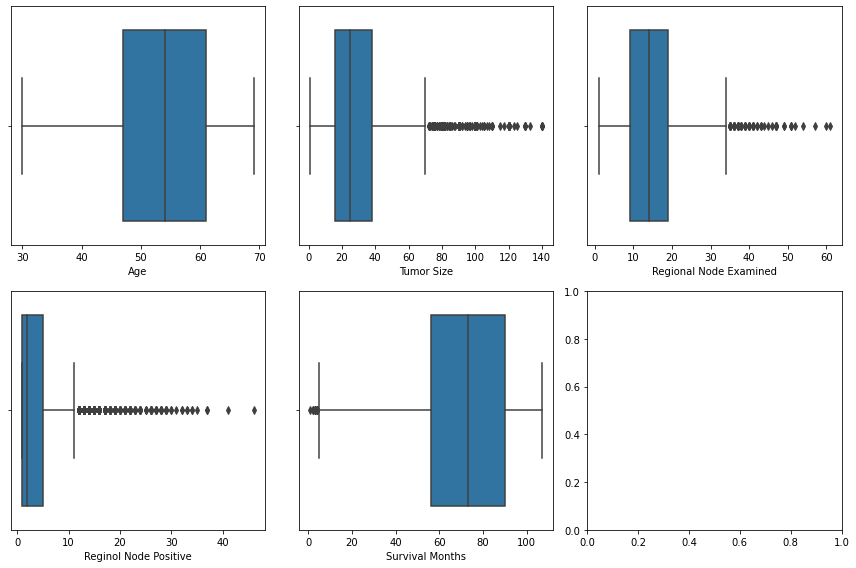

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))
axes = axes.flatten()

for ax, col in zip(axes, df.select_dtypes(exclude='object').columns):
     sns.boxplot(x=col, data=df, ax=ax)


plt.tight_layout()
plt.show()

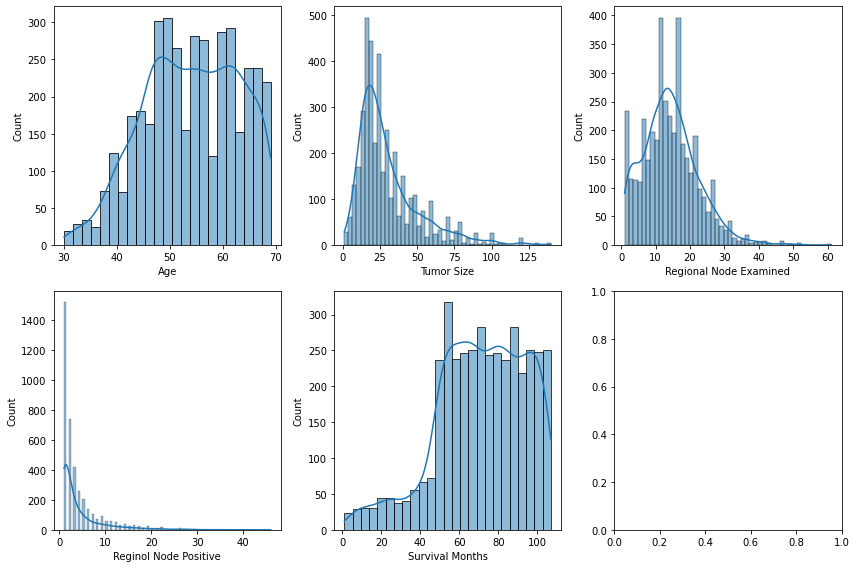

In [15]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))
axes = axes.flatten()

for ax, col in zip(axes, df.select_dtypes(exclude='object').columns):
#     sns.boxplot(x=col, data=df, ax=ax)
    sns.histplot(x=col, data=df, kde='True', ax=ax) 

plt.tight_layout()
plt.show()

In [16]:
for col in df.select_dtypes(exclude='object').columns: 
    print(col, stats.skew(df[col]))

Age -0.21984951902435948
Tumor Size 1.738737882231101
Regional Node Examined 0.8285755394696898
Reginol Node Positive 2.701175330252809
Survival Months -0.5902268781434038


**NOTE**

- `Tumor size` and `Regional Node Positive` are highly positive skewed and transformation may be needed. 
- `Age` is slightly negative skewed and `Survival Months` is moderately negative skewed.
- `Regional Node Examined` is moderately positive skewed.
- For `Survival Months`, it's autucally highly related to `Status` and is imbalanced to some extent. We may bin it to a binary feature. 

### 1.2 Univariate - categorical

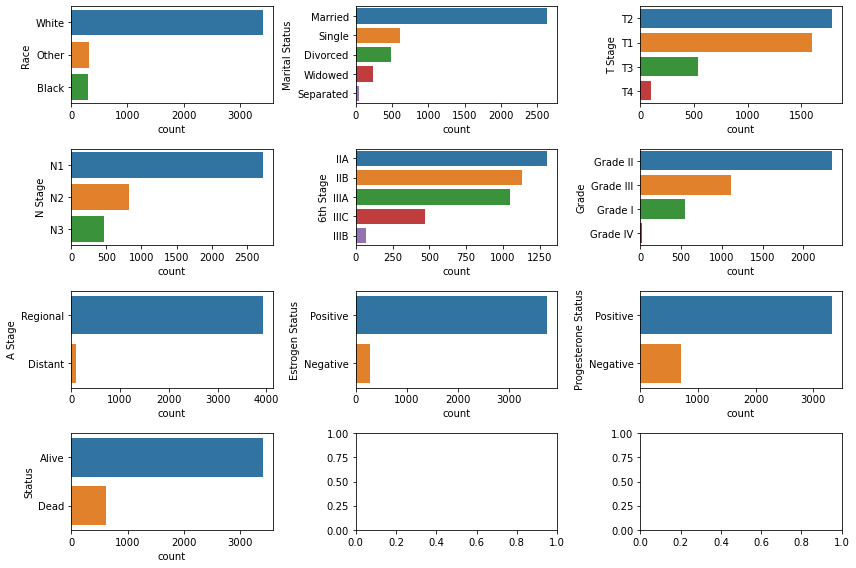

In [17]:
fig, axes = plt.subplots(4, 3, figsize=(12,8))
axes = axes.flatten()

for ax, col in zip(axes, df.select_dtypes('object').columns):
    sns.countplot(y=col, data=df, ax=ax, order=df[col].value_counts().index)

plt.tight_layout()
plt.show()

**NOTE from LYX**

1. Most patients are white persons and got married.
2. Most of their neoplasm has extended, which is regional.
3. Most of their estrogen and progesterone status are positive.
4. The target table is imbalanced, with odds ratio more than 1/5 (Dead/Alive). 

### 1.3 Bivariate - correlation

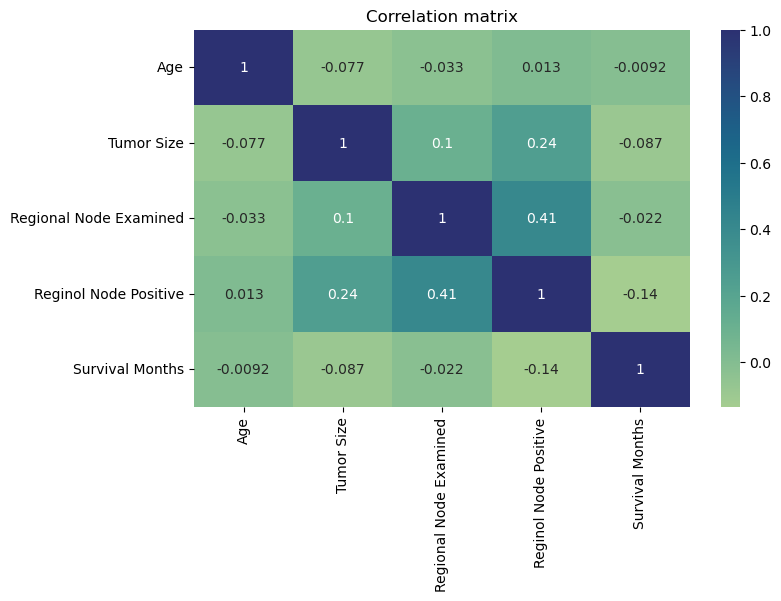

In [18]:
plt.figure(figsize=(8,5), dpi=100)
sns.heatmap(df.corr(), annot=True, cmap='crest')
plt.title('Correlation matrix');

**NOTE from LYX**

We don't find any highly correlated features, so we will keep them all.

### 1.4 Bivariate - numerical vs Y

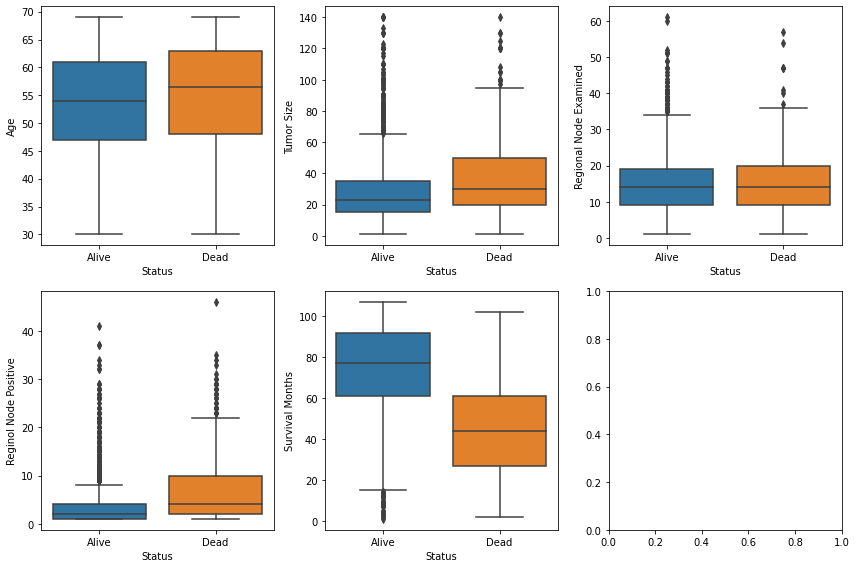

In [19]:
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
axes = axes.flatten()

for ax, col in zip(axes, df.select_dtypes(exclude='object').columns):
#     sns.histplot(data=df, x=col, hue='Status', ax=ax, multiple='stack', bins=20)
    sns.boxplot(x='Status', y=col, data=df, ax=ax)
    
plt.tight_layout()
plt.show()

**NOTE**

The following features may good factors to predict patient `status`. 

- `Age`. Older patients are more likely to die, which makes sense.
- `Tumor Size`. Patients with larger tumor sizr are more likely to die, which makes sense. 
- `Reginal Node Positive`. Patients with more regional lymph nodes containing metastases are more likely to die, which makes sense. 
- `Survival Months`. Patients with more survival time after diagnosis are more likely going to be alive, which makes sense.

### 1.5 Bivariate - categorical vs Y

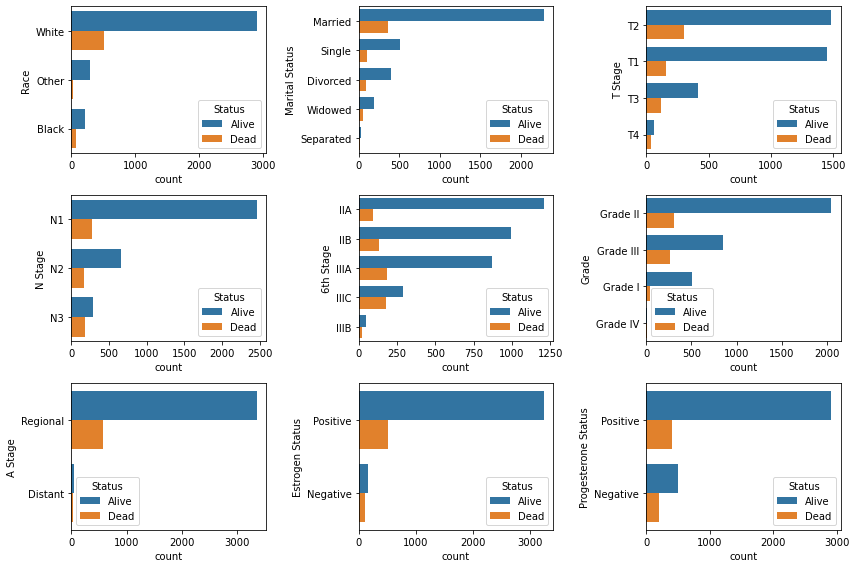

In [20]:
fig, axes = plt.subplots(3, 3, figsize=(12, 8))
axes = axes.flatten()

for ax, col in zip(axes, df.select_dtypes('object').columns):
    sns.countplot(y=col, hue='Status', data=df, ax=ax, order=df[col].value_counts().index)
    
plt.tight_layout()
plt.show()

**NOTE**

- For T, N, and 6th stage as well as grade, the higher/far the stage/grade is, the higher the probability to be dead.
- For ER and PR, patients with ER- or PR- would get a higher probability to be dead. 

## 2 Feature Engineering and Splitting

### 2.1 Feature generation

In [21]:
df['Survival_bin'] = np.where(df['Survival Months']<42, 1, 0) # 1 means dangerous, 0 means not in danger

contingency = pd.crosstab(df['Survival_bin'], df['Status'])

# Chi-Square test
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency)
print("p-value:", p_value)

p-value: 8.985264898991281e-248


In [22]:
df['Pos_exam_ratio'] = round(df['Reginol Node Positive'] / df['Regional Node Examined'], 2)

# t-test
t_stat, p_value = stats.ttest_ind(df.loc[df.Status=='Alive', 'Pos_exam_ratio'], 
                                       df.loc[df.Status=='Dead', 'Pos_exam_ratio'])
print("p-value:", p_value)

p-value: 1.214203382078863e-53


### 2.2 Ordinal feature encoding

In [23]:
for i in df.select_dtypes('object').columns:
    print(i, df[i].unique())

Race ['Other' 'White' 'Black']
Marital Status ['Married' 'Divorced' 'Single' 'Widowed' 'Separated']
T Stage ['T2' 'T1' 'T3' 'T4']
N Stage ['N3' 'N2' 'N1']
6th Stage ['IIIC' 'IIIA' 'IIB' 'IIA' 'IIIB']
Grade ['Grade II' 'Grade III' 'Grade I' 'Grade IV']
A Stage ['Regional' 'Distant']
Estrogen Status ['Positive' 'Negative']
Progesterone Status ['Positive' 'Negative']
Status ['Alive' 'Dead']


In [24]:
ord_cols = ['T Stage', 'N Stage', '6th Stage', 'Grade']
nom_cols = ['Race', 'Marital Status', 'A Stage', 'Estrogen Status', 'Progesterone Status']

t_map = {'T1': 0, 'T2': 1, 'T3': 2, 'T4':3}
n_map = {'N1': 0, 'N2': 1, 'N3': 2}
stage6_map = {'IIA': 0, 'IIB': 1, 'IIIA': 2, 'IIIB':3, 'IIIC':4}
grade_map = {'Grade I': 0, 'Grade II': 1, 'Grade III': 2, 'Grade IV':3}

map_list = [t_map, n_map, stage6_map, grade_map]


def ordinal_encoding(df, col_list, map_list):
    '''
    Encode ordinal categorical features into ordinal numerical values(0,1,2,3,,,) - instead one-hot encoding.
    '''
    df_copy = df.copy()
    
    for col, m in zip(col_list, map_list):
        df_copy[col] = df_copy[col].map(m)
        
    return df_copy

In [25]:
df = ordinal_encoding(df, ord_cols, map_list)
df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status,Survival_bin,Pos_exam_ratio
0,43,Other,Married,1,2,4,1,Regional,40,Positive,Positive,19,11,1,Alive,1,0.58
1,47,Other,Married,1,1,2,1,Regional,45,Positive,Positive,25,9,2,Alive,1,0.36
2,67,White,Married,1,0,1,2,Regional,25,Positive,Positive,4,1,2,Dead,1,0.25
3,46,White,Divorced,0,0,0,1,Regional,19,Positive,Positive,26,1,2,Dead,1,0.04
4,63,White,Married,1,1,2,1,Regional,35,Positive,Positive,21,5,3,Dead,1,0.24


### 2.3 Nominal feature encoding 

In [26]:
df = pd.get_dummies(df, 
                   columns=['Race', 'Marital Status', 'A Stage', 'Estrogen Status', 'Progesterone Status'],
                   drop_first=True)
df.head()

,Age,T Stage,N Stage,6th Stage,Grade,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months,Status,...,Pos_exam_ratio,Race_Other,Race_White,Marital Status_Married,Marital Status_Separated,Marital Status_Single,Marital Status_Widowed,A Stage_Regional,Estrogen Status_Positive,Progesterone Status_Positive
0,43,1,2,4,1,40,19,11,1,Alive,...,0.58,1,0,1,0,0,0,1,1,1
1,47,1,1,2,1,45,25,9,2,Alive,...,0.36,1,0,1,0,0,0,1,1,1
2,67,1,0,1,2,25,4,1,2,Dead,...,0.25,0,1,1,0,0,0,1,1,1
3,46,0,0,0,1,19,26,1,2,Dead,...,0.04,0,1,0,0,0,0,1,1,1
4,63,1,1,2,1,35,21,5,3,Dead,...,0.24,0,1,1,0,0,0,1,1,1


### 2.4 Splitting 

In [27]:
X = df.drop(columns="Status", axis=1)
y = df["Status"]

In [28]:
# label encoding
class_map = {'Alive': 0, 'Dead': 1}
y = y.map(class_map)
y.value_counts()

0    3407
1     616
Name: Status, dtype: int64

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=RANDOM_SEED)

### 2.5 Over sampling

**NOTE**

As the class is imbalanced, over sampling is conducted.

In [30]:
smote = SMOTE(random_state=RANDOM_SEED)
X_train, y_train = smote.fit_resample(X_train, y_train)
y_train.value_counts()

0    2725
1    2725
Name: Status, dtype: int64

In [31]:
X_train_nosca = X_train.copy() # backup
X_test_nosca = X_test.copy()

### 2.6 Feature scaling

In [32]:
scaler_X = StandardScaler()
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

## 3 Modeling

### 3.1 Initial modeling 

In [33]:
# Classifiers
lr_clf = LogisticRegression(solver='saga', random_state=RANDOM_SEED)
dt_clf = DecisionTreeClassifier(random_state=RANDOM_SEED)
rf_clf = RandomForestClassifier(random_state=RANDOM_SEED)
nb_clf = BernoulliNB()
knn_clf = KNeighborsClassifier()
lsvm_clf = LinearSVC(dual=False)
svm_clf = SVC()

# Parameters 
lr_params = dict(C=loguniform(1e-1, 1e2),penalty=['l1', 'l2'])
dt_params = dict(criterion=['gini', 'entropy'],
                 min_samples_split=[2, 4, 6, 8, 10, 12, 14, 16],
                 max_depth=[2, 4, 6, 8, 10])
rf_params = dict(n_estimators=[100, 150, 200],
                criterion=['gini', 'entropy'],
                max_depth=[2, 4, 6, 8, 10],
                min_samples_split=[2, 4, 6, 8, 10, 12, 14, 16])
nb_params = dict(alpha=loguniform(1e-1, 1e2))
knn_params = dict(n_neighbors=[2, 4, 6, 8, 10, 12],
               weights=['uniform', 'distance'])
lsvm_params = dict(C=loguniform(1e-1, 1e2))
svm_params = dict(C=loguniform(1e-1, 1e2))

clf_list = [lr_clf, dt_clf, rf_clf, nb_clf, knn_clf, lsvm_clf, svm_clf]
params_list = [lr_params, dt_params, rf_params, nb_params, knn_params, lsvm_params, svm_params]
model_suffix = ['_lr', '_dt', '_rf', '_nb', '_knn', '_lsvm', '_svm']
model_names = ['Logistic Regression', 'Decison Tree', 'Random Forest', 'Bernoulli Naive Bayes',
               'KNN Classifier', 'Linear SVM', 'SVM']

In [34]:
def train_model_rscv(X_train, y_train, model_suffix=model_suffix, clf_list=clf_list, params_list=params_list):
    for i in range(len(clf_list)):
        # train model with RandomizedSearchCV
        rscv = RandomizedSearchCV(estimator=clf_list[i],
                                  param_distributions=params_list[i],
                                  cv=10, n_jobs=-1, scoring='roc_auc', random_state=RANDOM_SEED)
        rscv.fit(X_train, y_train)
        # store cv results
        globals()['rscv%s' % model_suffix[i]] = pd.DataFrame(rscv.cv_results_)
        # store best parameters from cv
        globals()['params%s' % model_suffix[i]] = pd.DataFrame(rscv.best_params_, index=[0])
        # store best model from cv
        globals()['best%s' % model_suffix[i]] = rscv

In [35]:
def eval_model(X_test, y_test, clf_list, model_names):
    acc = []
    f1 = []
    precision = []
    recall = []
    auc = []

    for clf in clf_list:
        y_pred = clf.predict(X_test)
        acc.append(accuracy_score(y_test, y_pred))
        f1.append(f1_score(y_test, y_pred, pos_label=1, average=None)[1])
        precision.append(precision_score(y_test, y_pred, pos_label=1, average=None)[1])
        recall.append(recall_score(y_test, y_pred, pos_label=1, average=None)[1])
        auc.append(roc_auc_score(y_test, y_pred))

    return pd.DataFrame(data={'Model': model_names, 'Accuracy': acc, 'F1_score': f1, 'Precision':precision,
                             'Recall': recall, "AUC": auc})

In [36]:
# train models
train_model_rscv(X_train, y_train)
best_clfs = [best_lr, best_dt, best_rf, best_nb, best_knn, best_lsvm, best_svm]

In [37]:
# evaluate results
perf_table = eval_model(X_test, y_test, best_clfs, model_names)

### Baseline model 

In [38]:
def baseline_model(cutoff=0.6, y_test=y_test):
    """
    Baseline model for binary classification

    cutoff : Probability of predicting class 1

    """
    model_name = 'Baseline'
    y_pred = [1 if random.random() < cutoff else 0 for _ in range(len(y_test))]
    
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, pos_label=1, average=None)[1]
    precision = precision_score(y_test, y_pred, pos_label=1, average=None)[1]
    recall = recall_score(y_test, y_pred, pos_label=1, average=None)[1]
    auc = roc_auc_score(y_test, y_pred)
    

    return pd.DataFrame(data={'Model': model_name, 
                              'Accuracy': acc, 
                              'F1_score': f1, 
                              'Precision':precision,
                              'Recall': recall, 
                              'AUC': auc}, index=[0])

In [39]:
counts = df['Status'].value_counts()
counts[1] / (counts[0] + counts[1])

0.15311956251553566

In [40]:
# baseline model - for any patient, the probability of being dead is 0.15 based on the distritution if classes
baseline = baseline_model(cutoff=0.15, y_test=y_test) 
perf_table = pd.concat([perf_table, baseline])
perf_table

,Model,Accuracy,F1_score,Precision,Recall,AUC
0,Logistic Regression,0.843478,0.536765,0.489933,0.593496,0.741029
1,Decison Tree,0.824845,0.505263,0.444444,0.585366,0.726701
2,Random Forest,0.891925,0.639004,0.652542,0.626016,0.782949
3,Bernoulli Naive Bayes,0.814907,0.517799,0.430108,0.650407,0.747491
4,KNN Classifier,0.827329,0.494545,0.447368,0.552846,0.714839
5,Linear SVM,0.842236,0.534799,0.486667,0.593496,0.740296
6,SVM,0.865839,0.564516,0.560000,0.569106,0.744230
0,Baseline,0.739130,0.117647,0.121739,0.113821,0.482864


**NOTE**

1. Performance of all models is better than the random choiced base line model, which means the machine learning methods are effective. 
2. Generally, random forest performs the best (with the highest AUC, highest F1), so this would be the model to be recommended for prediction. 
3. Considering the interpretation of models, in the following stage, we'll firstly use logistic regression to better understand the relations between features and target, which will then be used to optimize other advanced models (like random forest) to get better prediction performance.

### 3.2 Logistic regresison 

**NOTE**

To do feature selection and understand the influece of each feature, we introduce statsmodels.

In [41]:
import statsmodels.api as sm

X_train_ols = sm.add_constant(X_train_nosca)
ols_clf = sm.Logit(y_train, X_train_ols)

ols = ols_clf.fit()
ols.summary()

Optimization terminated successfully.
         Current function value: 0.347446
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Status   No. Observations:                 5450
Model:                          Logit   Df Residuals:                     5429
Method:                           MLE   Df Model:                           20
Date:                Tue, 04 Apr 2023   Pseudo R-squ.:                  0.4987
Time:                        23:10:39   Log-Likelihood:                -1893.6
converged:                       True   LL-Null:                       -3777.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            6.5094      0.480     13.557      0.000       5.568       7.450
Age                              0.0149      0.005      3.040      0.002       0.005       0.024
T Stage                         -0.1362      0.117     -1.160      0.246      -0.366       0.094
N Stage                         -1.0291      0.170     -6.067      0.000      -1.362      -0.697
6th Stage                        0.3405      0.109      3.113      0.002       0.126       0.555
Grade                           -0.0390      0.070     -0.557      0.578      -0.176       0.098
Tumor Size                       0.0051      0.003      1.618      0.106      -0.001       0.011
Regional Node Examined          -0.0167      0.009     -1.814      0.070      -0.035       0.001
Reginol Node Positive            0.0791      0.020      3.975      0.000       0.040       0.118
Survival Months                 -0.0501      0.003    -19.411      0.000      -0.055      -0.045
Survival_bin                     0.9173      0.174      5.275      0.000       0.577       1.258
Pos_exam_ratio                   1.8299      0.281      6.519      0.000       1.280       2.380
Race_Other                      -3.2587      0.272    -11.973      0.000      -3.792      -2.725
Race_White                      -1.7195      0.126    -13.683      0.000      -1.966      -1.473
Marital Status_Married          -1.7269      0.097    -17.885      0.000      -1.916      -1.538
Marital Status_Separated        -2.6892      0.529     -5.083      0.000      -3.726      -1.652
Marital Status_Single           -2.7757      0.165    -16.857      0.000      -3.098      -2.453
Marital Status_Widowed          -2.8205      0.243    -11.614      0.000      -3.296      -2.344
A Stage_Regional                -0.9792      0.224     -4.372      0.000      -1.418      -0.540
Estrogen Status_Positive        -0.6574      0.170     -3.866      0.000      -0.991      -0.324
Progesterone Status_Positive    -1.0585      0.106     -9.983      0.000      -1.266      -0.851
================================================================================================
"""

In [42]:
ols_clf = sm.Logit(y_train, X_train_ols.drop(['T Stage', 'Grade'], axis=1))
ols = ols_clf.fit()

ols.summary()

Optimization terminated successfully.
         Current function value: 0.347606
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Status   No. Observations:                 5450
Model:                          Logit   Df Residuals:                     5431
Method:                           MLE   Df Model:                           18
Date:                Tue, 04 Apr 2023   Pseudo R-squ.:                  0.4985
Time:                        23:10:54   Log-Likelihood:                -1894.5
converged:                       True   LL-Null:                       -3777.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            6.4610      0.464     13.928      0.000       5.552       7.370
Age                              0.0152      0.005      3.135      0.002       0.006       0.025
N Stage                         -0.9325      0.147     -6.326      0.000      -1.221      -0.644
6th Stage                        0.2575      0.085      3.037      0.002       0.091       0.424
Tumor Size                       0.0026      0.002      1.131      0.258      -0.002       0.007
Regional Node Examined          -0.0169      0.009     -1.837      0.066      -0.035       0.001
Reginol Node Positive            0.0816      0.020      4.122      0.000       0.043       0.120
Survival Months                 -0.0503      0.003    -19.545      0.000      -0.055      -0.045
Survival_bin                     0.9082      0.174      5.228      0.000       0.568       1.249
Pos_exam_ratio                   1.8279      0.281      6.510      0.000       1.278       2.378
Race_Other                      -3.2541      0.272    -11.968      0.000      -3.787      -2.721
Race_White                      -1.7191      0.126    -13.679      0.000      -1.965      -1.473
Marital Status_Married          -1.7317      0.096    -17.976      0.000      -1.920      -1.543
Marital Status_Separated        -2.6909      0.531     -5.069      0.000      -3.731      -1.650
Marital Status_Single           -2.7844      0.164    -16.927      0.000      -3.107      -2.462
Marital Status_Widowed          -2.8302      0.243    -11.635      0.000      -3.307      -2.353
A Stage_Regional                -0.9552      0.222     -4.311      0.000      -1.389      -0.521
Estrogen Status_Positive        -0.6461      0.168     -3.840      0.000      -0.976      -0.316
Progesterone Status_Positive    -1.0533      0.106     -9.943      0.000      -1.261      -0.846
================================================================================================
"""

In [43]:
ols_clf = sm.Logit(y_train, X_train_ols.drop(['T Stage', 'Grade', 'Tumor Size'], axis=1))
ols = ols_clf.fit()

ols.summary()

Optimization terminated successfully.
         Current function value: 0.347724
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Status   No. Observations:                 5450
Model:                          Logit   Df Residuals:                     5432
Method:                           MLE   Df Model:                           17
Date:                Tue, 04 Apr 2023   Pseudo R-squ.:                  0.4983
Time:                        23:11:02   Log-Likelihood:                -1895.1
converged:                       True   LL-Null:                       -3777.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            6.5358      0.459     14.237      0.000       5.636       7.436
Age                              0.0149      0.005      3.069      0.002       0.005       0.024
N Stage                         -0.9873      0.139     -7.080      0.000      -1.261      -0.714
6th Stage                        0.3110      0.070      4.417      0.000       0.173       0.449
Regional Node Examined          -0.0167      0.009     -1.813      0.070      -0.035       0.001
Reginol Node Positive            0.0797      0.020      4.044      0.000       0.041       0.118
Survival Months                 -0.0503      0.003    -19.556      0.000      -0.055      -0.045
Survival_bin                     0.9048      0.174      5.210      0.000       0.564       1.245
Pos_exam_ratio                   1.8356      0.281      6.537      0.000       1.285       2.386
Race_Other                      -3.2573      0.272    -11.983      0.000      -3.790      -2.725
Race_White                      -1.7181      0.126    -13.680      0.000      -1.964      -1.472
Marital Status_Married          -1.7312      0.096    -17.977      0.000      -1.920      -1.542
Marital Status_Separated        -2.6838      0.529     -5.076      0.000      -3.720      -1.647
Marital Status_Single           -2.7766      0.164    -16.919      0.000      -3.098      -2.455
Marital Status_Widowed          -2.8300      0.243    -11.627      0.000      -3.307      -2.353
A Stage_Regional                -0.9665      0.221     -4.367      0.000      -1.400      -0.533
Estrogen Status_Positive        -0.6515      0.168     -3.879      0.000      -0.981      -0.322
Progesterone Status_Positive    -1.0555      0.106     -9.966      0.000      -1.263      -0.848
================================================================================================
"""

**NOTE**

So far, we've got a logistic reression model with all features are significant at a significance level of 0.5. 
We'll use these features to build a best predictive logistic regression model. 

In [44]:
X_train_lr = X_train_nosca.drop(['T Stage', 'Grade', 'Tumor Size'], axis=1) 
X_test_lr = X_test_nosca.drop(['T Stage', 'Grade', 'Tumor Size'], axis=1) 
lr_clf = LogisticRegression(solver='newton-cholesky', penalty=None, random_state=RANDOM_SEED)
lr_clf.fit(X_train_lr, y_train)
y_pred = lr_clf.predict(X_test_lr)

In [45]:
def eval_clf(y_pred, y_test, model_name='New Model'):
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, pos_label=1, average=None)[1]
    precision = precision_score(y_test, y_pred, pos_label=1, average=None)[1]
    recall = recall_score(y_test, y_pred, pos_label=1, average=None)[1]
    auc = roc_auc_score(y_test, y_pred)
    
    return pd.DataFrame(data={'Model': model_name, 'Accuracy': acc, 'F1_score': f1, 'Precision':precision,
                             'Recall': recall, "AUC": auc}, index=[0])

In [46]:
perf_lr_reduced = eval_clf(y_pred, y_test, 'Logistic Regression - Reduced')
perf_lr_reduced

,Model,Accuracy,F1_score,Precision,Recall,AUC
0,Logistic Regression - Reduced,0.84472,0.545455,0.493421,0.609756,0.748426


**NOTE**

The AUC score, recall and precision is a little bit better than the initial logistic regression model from cross validation. Next, we'll choose a best threshold to maxmize AUC.

Optimal threshold: 0.4628314407300726


,Model,Accuracy,F1_score,Precision,Recall,AUC
0,Logistic Regression - Optimal,0.842236,0.551237,0.4875,0.634146,0.756956


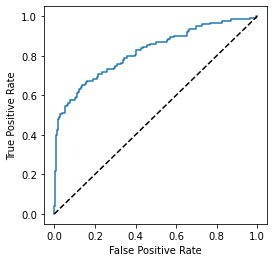

In [47]:
y_prob = lr_clf.predict_proba(X_test_lr)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(4, 4))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Find the optimal threshold that maximizes the ROC AUC score
optimal_threshold = thresholds[np.argmax(tpr - fpr)]
print("Optimal threshold:", optimal_threshold)

# Use the optimal threshold to make predictions
y_pred = (y_prob >= optimal_threshold).astype(int)

perf_lr_optimal = eval_clf(y_pred, y_test, 'Logistic Regression - Optimal')
perf_lr_optimal

In [48]:
pd.DataFrame(data=lr_clf.coef_.T, index=X_train_lr.columns, columns=['Coef'])

,Coef
Age,0.014867
N Stage,-0.987277
6th Stage,0.311032
Regional Node Examined,-0.016699
Reginol Node Positive,0.079710
Survival Months,-0.050348
Survival_bin,0.904675
Pos_exam_ratio,1.835599
Race_Other,-3.257193
Race_White,-1.718013


In [49]:
lr_clf.intercept_

array([6.53560383])

**CONCLUSION about the LOGISTIC REGRESSION with best PERFORMANCE**

- The optimal threshold is 0.46, which leads to an AUC score of 0.76. This result is pretty much better than the base line model. 
- The logistic regression function is: $logit_d_e_a_d = 6.54 + 0.01*Age - 0.99*N Stage + 0.31*6th Stage - 0.02*Regional Node Examined + 0.08*Reginol Node Positive - 0.05*Survival Months + 0.90*Survival_bin + 1.84*Pos_exam_ratio - 3.26*Race_Other - 1.72*Race_White - 1.73*Marital Status_Married - 2.68*Marital Status_Separated - 2.78*Marital Status_Single - 2.83*Marital Status_Widowed - 0.97*A Stage_Regional - 0.65*Estrogen Status_Positive - 1.06*Progesterone Status_Positive$

**NEXT STEP**

Simplest logistic regression.

### 3.3 Random forest 

Optimal threshold: 0.45479301820145523


,Model,Accuracy,F1_score,Precision,Recall,AUC
0,Random Forest - Optimal,0.878261,0.623077,0.591241,0.658537,0.788213


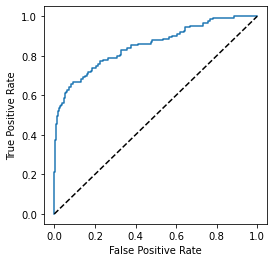

In [50]:
y_prob = best_rf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(4, 4))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Find the optimal threshold that maximizes the ROC AUC score
optimal_threshold = thresholds[np.argmax(tpr - fpr)]
print("Optimal threshold:", optimal_threshold)

# Use the optimal threshold to make predictions
y_pred = (y_prob >= optimal_threshold).astype(int)

perf_lr_optimal = eval_clf(y_pred, y_test, 'Random Forest - Optimal')
perf_lr_optimal

**NOTE**

By optimizing the threashold, we got a best prediction model with a AUC of 0.79 and a recall score of 0.66. This model is good to be used in prediction.

In [52]:
params_rf

,n_estimators,min_samples_split,max_depth,criterion
0,200,6,10,gini


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Survival Months'),
  Text(1, 0, 'Pos_exam_ratio'),
  Text(2, 0, 'Survival_bin'),
  Text(3, 0, 'Progesterone Status_Positive'),
  Text(4, 0, 'Marital Status_Married'),
  Text(5, 0, 'Tumor Size'),
  Text(6, 0, 'Reginol Node Positive'),
  Text(7, 0, 'Age'),
  Text(8, 0, 'Regional Node Examined'),
  Text(9, 0, 'Marital Status_Single'),
  Text(10, 0, 'Estrogen Status_Positive'),
  Text(11, 0, '6th Stage'),
  Text(12, 0, 'Race_White'),
  Text(13, 0, 'Race_Other'),
  Text(14, 0, 'Grade'),
  Text(15, 0, 'T Stage'),
  Text(16, 0, 'N Stage'),
  Text(17, 0, 'Marital Status_Widowed'),
  Text(18, 0, 'A Stage_Regional'),
  Text(19, 0, 'Marital Status_Separated')])

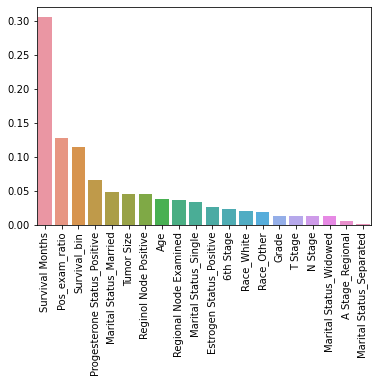

In [58]:
rf = RandomForestClassifier(n_estimators=200, min_samples_split=6, max_depth=10, criterion='gini', random_state=RANDOM_SEED)
rf.fit(X_train, y_train)
importance = rf.feature_importances_
index = np.argsort(importance)[::-1]
sns.barplot(x=X.columns[index], y=importance[index]) 
plt.xticks(rotation=90)